# March Machine Learning Mania 2017

## Season 分析



In [1]:
import csv
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

### 读取数据

In [9]:
# 读取RegularSeasonCompactResults
df_rscr = pd.read_csv('data/RegularSeasonCompactResults.csv')
df_rscr.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [84]:
# 读取Teams
df_teams = pd.read_csv('data/Teams.csv')
df_teams.head()

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


### 主客场胜率

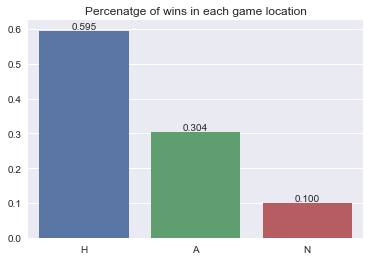

In [10]:
# 取 Wloc 列，并计数
se_wloc = df_rscr['Wloc'].value_counts()
# 绘制bar plot
ax = sns.barplot(list(se_wloc.axes[0]), se_wloc.values / se_wloc.sum())
# 写具体的值
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.005, '{:1.3f}'.format(height), ha="center") 
# 标题
ax.set_title('Percenatge of wins in each game location')
plt.show()

### 加时情况

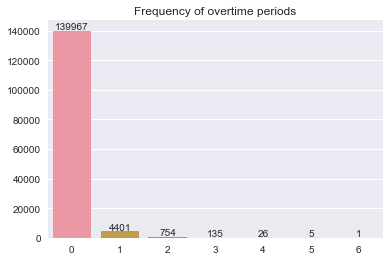

In [45]:
# 取 Numot 列，并计数
se_num_ot = df_rscr['Numot'].value_counts()
# 绘制bar plot
# plt.subplots(figsize=(12, 8))
ax = sns.barplot(list(se_num_ot.axes[0]), se_num_ot.values)
# 写具体的值
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1000, '{:1.0f}'.format(height), ha="center") 
# 标题
ax.set_title('Frequency of overtime periods')
plt.show()

### Win percentage for all teams

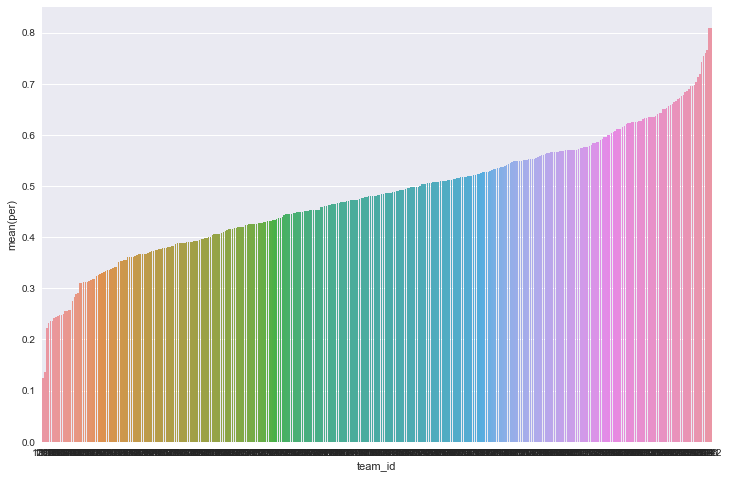

In [83]:
# 取 Wteam、Lteam 列，并计数
se_win_team = df_rscr['Wteam'].value_counts()
se_loss_team = df_rscr['Lteam'].value_counts()

teams_id = list(se_loss_team.axes[0])

team_win_per = {}
for team_id in teams_id:
    team_win_per[team_id] = {
        'team_id': team_id,
        'win_num': se_win_team[team_id],
        'loss_num': se_loss_team[team_id],
        'per': se_win_team[team_id] / (se_win_team[team_id] + se_loss_team[team_id])
    }

df_win_per = pd.DataFrame.from_dict(team_win_per, orient='index')
df_win_per = df_win_per.sort_values('per')

order_team_id = list(df_win_per['per'].axes[0])

plt.subplots(figsize=(12, 8))
sns.barplot(x='team_id', y='per', data=df_win_per, order=order_team_id)
plt.show()